In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('netflix.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [4]:
#Lets check for the first few rows. We see we need to remove the double quotes from some columns
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"""Demián Bichir, Héctor Bonilla, Oscar Serrano,...",Mexico,"""December 23, 2016""",2016,93,"""After a devastating earthquake hits Mexico Ci...",Dramas
1,s3,Movie,23:59,Gilbert Chan,"""Tedd Chan, Stella Chung, Henley Hii, Lawrence...",Singapore,"""December 20, 2018""",2011,78,"""When an army recruit is found dead, his fello...",Horror Movies
2,s4,Movie,9,Shane Acker,"""Elijah Wood, John C. Reilly, Jennifer Connell...",United States,"""November 16, 2017""",2009,80,"""In a postapocalyptic world, rag-doll robots h...",Action
3,s5,Movie,21,Robert Luketic,"""Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",United States,"""January 1, 2020""",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"""Erdal Beşikçioğlu, Yasemin Allen, Melis Birka...",Turkey,"""July 1, 2017""",2016,1,"""A genetics professor experiments with a treat...",International TV


In [5]:
#Lets check for Duplicates
df.duplicated().sum()

0

In [6]:
#Lets check the structure of our data
df.shape

(4812, 11)

In [7]:
#Lets see how many unique records we have of show_id column
df['show_id'].nunique()

4812

In [8]:
#Lets create a copy as we need to perform some data manipulation on some columns
netflix = df.copy()

In [9]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"""Demián Bichir, Héctor Bonilla, Oscar Serrano,...",Mexico,"""December 23, 2016""",2016,93,"""After a devastating earthquake hits Mexico Ci...",Dramas
1,s3,Movie,23:59,Gilbert Chan,"""Tedd Chan, Stella Chung, Henley Hii, Lawrence...",Singapore,"""December 20, 2018""",2011,78,"""When an army recruit is found dead, his fello...",Horror Movies
2,s4,Movie,9,Shane Acker,"""Elijah Wood, John C. Reilly, Jennifer Connell...",United States,"""November 16, 2017""",2009,80,"""In a postapocalyptic world, rag-doll robots h...",Action
3,s5,Movie,21,Robert Luketic,"""Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",United States,"""January 1, 2020""",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"""Erdal Beşikçioğlu, Yasemin Allen, Melis Birka...",Turkey,"""July 1, 2017""",2016,1,"""A genetics professor experiments with a treat...",International TV


In [10]:
#We have to pull out the needed columns into a list
needed_cols = ['cast', 'date_added', 'description']

In [11]:
#Using a for loop to replace the double quotes with an empty string
for col in needed_cols:
    netflix[col] = netflix[col].str.replace('"', '')

In [12]:
#Using the 2nd method with lambda function
netflix[needed_cols] = netflix[needed_cols].apply(lambda x: x.str.replace('"', ''))

In [13]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [14]:
#CONVERT THE DATE COLUMN
#lets convert the date column into a datetime format
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

#opps, we just noticed that " August 4, 2017" doesn't match format "%B %d, %Y", at position 161. So we need to strip space

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 161. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [15]:
netflix['date_added'] = netflix['date_added'].str.strip()

In [16]:
#Now lets convert the date column into a datetime format
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

In [17]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       4812 non-null   object        
 1   type          4812 non-null   object        
 2   title         4812 non-null   object        
 3   director      4812 non-null   object        
 4   cast          4812 non-null   object        
 5   country       4812 non-null   object        
 6   date_added    4812 non-null   datetime64[ns]
 7   release_year  4812 non-null   int64         
 8   duration      4812 non-null   int64         
 9   description   4812 non-null   object        
 10  genre         4812 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 413.7+ KB


In [18]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,1,A genetics professor experiments with a treatm...,International TV


### Using EDA to answer questions

__*1. What was the most frequent movie duration in the 1990s?*__

- columns needed: Release year, duration, type

In [19]:
#Lets first create a filtred dataframe for records between 1990 and 1999
nineties = netflix[(netflix['release_year'] >= 1990) & (netflix['release_year'] <= 1999)]
nineties['release_year'].unique()

#So, we good

array([1997, 1993, 1998, 1996, 1990, 1999, 1991, 1994, 1995, 1992],
      dtype=int64)

In [20]:
#Method 2 - Lets do this and create another copy of our datafram
nineties = netflix[netflix['release_year'].between(1990, 1999)].copy()

In [21]:
nineties.shape

(184, 11)

In [22]:
nineties.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,2018-04-01,1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,2019-12-01,1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,2020-12-01,1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,2017-06-01,1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


In [23]:
#Next, lets find the most frequent of the nineties movies - But, lets first make sure its a movie
nineties_movies = nineties[nineties['type']=='Movie']
nineties_movies['type'].unique()

array(['Movie'], dtype=object)

In [24]:
nineties_movies.shape, nineties.shape

((183, 11), (184, 11))

In [25]:
#Now, lets count
most_freq = nineties_movies['duration'].value_counts().nlargest(1)
most_freq
#Answer - The most frequent duration of the nineties was 94, which occured 7 times

duration
94    7
Name: count, dtype: int64

In [26]:
nineties_movies['duration'].value_counts().nlargest(1)

duration
94    7
Name: count, dtype: int64

__* 2 A movie is considered short if it is less than 90 minutes Count the number of short action movies released in the 1990s?*__

In [27]:
#Step 1 - We already have a datafram for 1990s movie. so, lets filter that further to just records with action movies
action_movies_90 = nineties_movies[nineties_movies['genre'] == 'Action']
action_movies_90.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
352,s508,Movie,Andaz Apna Apna,Rajkumar Santoshi,"Aamir Khan, Salman Khan, Raveena Tandon, Karis...",India,2020-05-11,1994,160,Broke and with no concrete plans for the futur...,Action
431,s628,Movie,Austin Powers: The Spy Who Shagged Me,Jay Roach,"Mike Myers, Heather Graham, Michael York, Robe...",United States,2019-12-01,1999,95,When diabolical genius Dr. Evil travels back i...,Action
468,s688,Movie,Bad Boys,Michael Bay,"Will Smith, Martin Lawrence, Téa Leoni, Tchéky...",United States,2019-10-01,1995,119,"In this fast-paced actioner, two Miami narcoti...",Action
515,s757,Movie,Barsaat,Rajkumar Santoshi,"Twinkle Khanna, Bobby Deol, Danny Denzongpa, R...",India,2018-04-01,1995,166,A naïve young man and a rich city girl fall in...,Action
675,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...",Germany,2021-01-01,1999,94,A jewel thief returns to his hiding place afte...,Action


In [28]:
# Step 2 is to filter down to short action movies
sht_act_mov90 = action_movies_90[action_movies_90['duration']<90]

In [29]:
sht_act_mov90

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1288,s2039,Movie,EVANGELION: DEATH (TRUE)²,Hideaki Anno,"Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,2019-06-21,1998,69,"Fifteen years after the Second Impact, apathet...",Action
1698,s2708,Movie,Hero,Corey Yuen,"Takeshi Kaneshiro, Yuen Biao, Valerie Chow, Je...",Hong Kong,2018-08-01,1997,89,A pugilist from Shantung struggles to rise to ...,Action
2328,s3718,Movie,"""Look Out, Officer""",Sze Yu Lau,"Stephen Chow, Bill Tung, Stanley Sui-Fan Fung,...",Hong Kong,2018-08-16,1990,88,An officer killed on the job returns to Earth ...,Action
2993,s4787,Movie,Passenger 57,Kevin Hooks,"Wesley Snipes, Bruce Payne, Tom Sizemore, Alex...",United States,2021-01-01,1992,84,Air marshal John Cutter must stop notorious te...,Action
3297,s5299,Movie,Rumble in the Bronx,Stanley Tong,"Jackie Chan, Anita Mui, Françoise Yip, Bill Tu...",Hong Kong,2019-11-01,1995,89,During a visit to the Bronx to help out at his...,Action
3806,s6114,Movie,The Bare-Footed Kid,Johnnie To,"Aaron Kwok, Lung Ti, Maggie Cheung, Chien-lien...",Hong Kong,2018-08-16,1993,83,"While working at a family friend's business, a...",Action
3943,s6330,Movie,The End of Evangelion,"""Hideaki Anno, Kazuya Tsurumaki""","Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,2019-06-21,1997,87,"Seele orders an all-out attack on NERV, aiming...",Action


In [30]:
#Step 3. Lets count after pulling out dataframe
#no_shortmoves = sht_act_mov90['title'].value_counts().sum()
#no_shortmoves

In [31]:
len(sht_act_mov90)

7

In [32]:
sht_act_mov90.shape[0]

7

Question 3: What was the most frequent movie genre in the 2010s?

In [33]:
#Step 1 - Filter 2010 movies
netflix_10 = netflix[(netflix['release_year'].between(2010, 2019)) & (netflix['type']== 'Movie')]
netflix_10.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
7,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,118,"When a doctor goes missing, his psychiatrist w...",Horror Movies
9,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,2017-10-20,2017,103,A farmer pens a confession admitting to his wi...,Dramas


In [34]:
#Step 2 - count the frequency of movie genres
netflix_10['genre'].value_counts().nlargest(1)

#Most frequent movie genre in 2010's is 'Dramas' based on our result below

genre
Dramas    1031
Name: count, dtype: int64

Question 4- What is the average duration of movies and TV shows on Netflix?

In [35]:
avg_duration = netflix.groupby('type')['duration'].mean().round(2)
avg_duration

type
Movie      102.38
TV Show      1.94
Name: duration, dtype: float64

In [36]:
#bonus. Lets do a multiple aggregation of the groups
duration_stats = netflix.groupby('type')['duration'].agg(['sum', 'count', 'mean', 'median']).round(2)
duration_stats

,sum,count,mean,median
type,,,,
Movie,478853,4677,102.38,100.0
TV Show,262,135,1.94,1.0


## MORE QUESTIONS

1.  Is there a relationship between release year and duration of movies?

In [37]:
netflix['release_year'].corr(netflix['duration'])

-0.22007069436434357

In [38]:
movies = netflix[netflix['type']=="Movie"]
movies.shape

(4677, 11)

In [39]:
movies['release_year'].corr(movies['duration'])

-0.21375921672904624

In [40]:
#The result show a weak negative relationship between release year and duration.
#This indicates that as the release year increases, (i.e., more recent), the duration of content tends to slightly decrease.

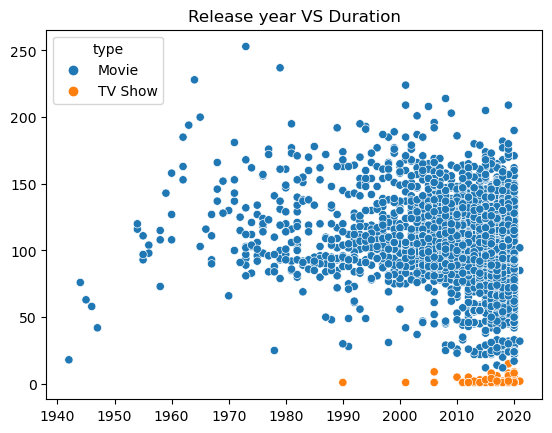

In [41]:
sns.scatterplot(data=netflix, x='release_year', y='duration', hue='type').set_title("Release year VS Duration")
#plt.title("Release year VS Duration")
plt.xlabel("")
plt.ylabel("");

***What is the trend in TV shows released over the years?***

In [42]:
tv_shows = netflix[netflix['type']=='TV Show'].copy()

In [43]:
tv_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,1,A genetics professor experiments with a treatm...,International TV
94,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,2019-07-30,2019,1,Multiple women report their husbands as missin...,TV Shows
151,s219,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,2020-11-11,2020,1,Gloria Groove and Alexia Twister make drag dre...,International TV
181,s261,TV Show,A.I.C.O.,Kazuya Murata,"Haruka Shiraishi, Yusuke Kobayashi, Makoto Fur...",Japan,2018-03-09,2018,1,Everything Aiko knew was a lie. Now she's join...,Anime Series
197,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...",United States,2020-07-01,2019,1,A big-hearted girl helps her Fuzzly friends wh...,Kids


In [44]:
tv_shows.shape

(135, 11)

In [45]:
tv_shows['genre'].value_counts().nlargest(5)

genre
International TV    39
Crime TV            30
British TV          20
Kids                10
Anime Series         9
Name: count, dtype: int64

In [46]:
tv_shows['release_year'].max()

2021

In [47]:
#TV Shows between 2018 and 2021
tv_1821 = tv_shows[tv_shows['release_year'].between(2018,2021)]
tv_1821.shape

(76, 11)

In [48]:
tv_1821['genre'].value_counts().nlargest(5)

#between 2018 and 2021m this shows us the highest the 5 highest number of genre

genre
International TV    24
Crime TV            23
British TV           7
Kids                 4
Stand-Up             4
Name: count, dtype: int64

In [49]:
tv_shows['release_year'].min()

1990

In [50]:
tv_1821['country'].value_counts().nlargest(5)

country
United States     17
United Kingdom     9
Taiwan             7
Spain              6
India              5
Name: count, dtype: int64

In [51]:
tv_shows['country'].value_counts().nlargest(5)

country
United States     30
United Kingdom    22
Japan             10
South Korea       10
Taiwan             7
Name: count, dtype: int64

# **Assignment - Analysis for 5 charts**

Q1. Trend of Movie Releases overtime

In [52]:
#1 No of shows for each year
trend_ofshows = tv_shows['release_year'].value_counts().sort_index()
trend_ofshows

release_year
1990     1
2001     1
2006     3
2010     1
2011     2
2012     4
2013     3
2014     7
2015     9
2016    10
2017    18
2018    17
2019    24
2020    34
2021     1
Name: count, dtype: int64

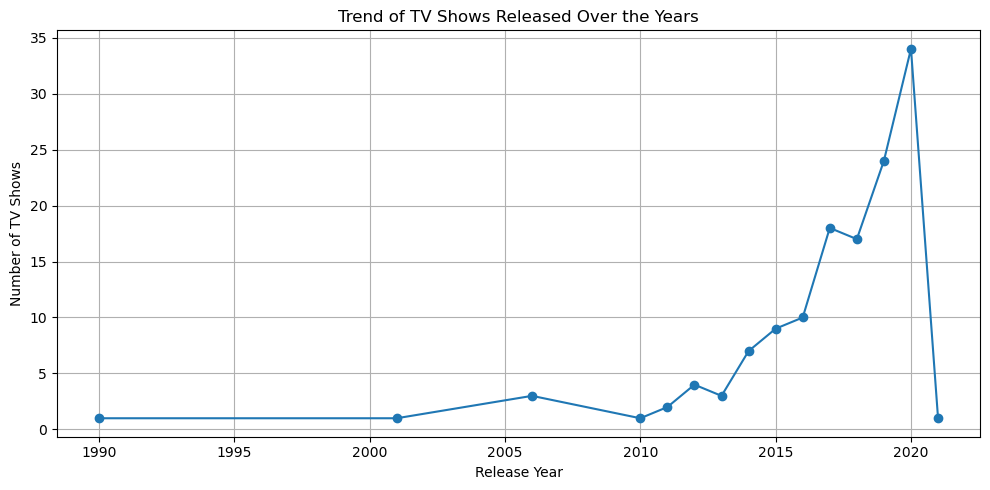

In [53]:
#Plotting our chart
plt.figure(figsize=(10, 5))
plt.plot(trend_ofshows.index, trend_ofshows.values, marker='o')
plt.xlabel('Release Year')
plt.ylabel('Number of TV Shows')
plt.title('Trend of TV Shows Released Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()

# Q2- What are the Top 5 countries producing movies?



In [103]:
top_5_country = movies['country'].value_counts().nlargest(5).sort_values()
top_5_country

country
France             129
Canada             151
United Kingdom     289
India              858
United States     1856
Name: count, dtype: int64

In [104]:
#Charting our result above
x = top_5_country.index
y = top_5_country.values

Text(0.5, 1.0, 'Top 5 Countries producing movies')

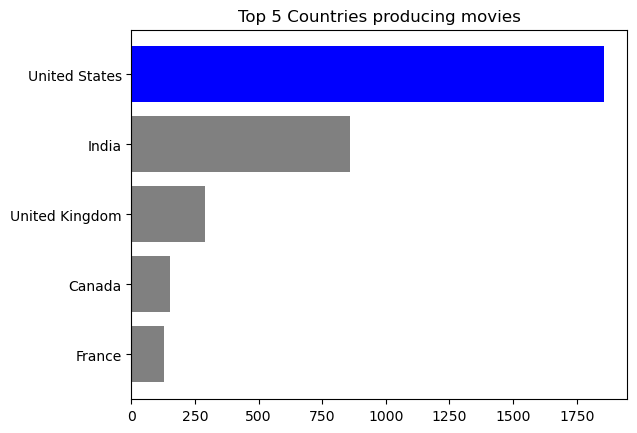

In [106]:
#Bar chart
plt.barh(x,y, color=['grey', 'grey', 'grey','grey', 'blue'])
plt.title("Top 5 Countries producing movies")

# **Q3- Most Popular Genres in 1990s Movies**

In [57]:
#Step 1 - Filter out movies released in the 90's
netflix_90s= netflix[netflix['release_year'].between(1990, 1999)]
netflix_90s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,2018-04-01,1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,2019-12-01,1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,2020-12-01,1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,2017-06-01,1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


In [58]:
pop_genre = netflix_90s['genre'].value_counts().nlargest().sort_values()
pop_genre

genre
Children          15
Classic Movies    15
Comedies          40
Dramas            44
Action            48
Name: count, dtype: int64

In [59]:
#Plotting out analysis
x_pop = pop_genre.index
y_pop = pop_genre.values

Text(0.5, 1.0, "Most popular Genres in the 90's")

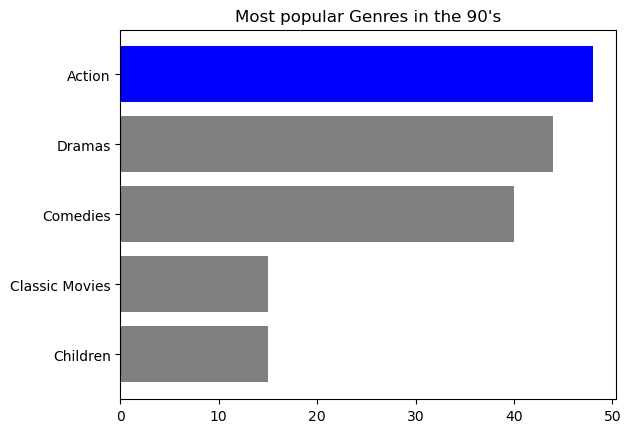

In [60]:
plt.barh(x_pop, y_pop, color=['grey', 'grey', 'grey','grey', 'blue'])
plt.title("Most popular Genres in the 90's")

# **Q4- Top 5 Most Frequent Cast Members**

In [98]:
#Our cast field has several casts on the same field. We need to split the column and use the explode function
split_cast = netflix['cast'].str.split(', ').explode()
split_cast

0               Demián Bichir
0              Héctor Bonilla
0               Oscar Serrano
0                Azalia Ortiz
0              Octavio Michel
                ...          
4811         Manish Chaudhary
4811             Meghna Malik
4811            Malkeet Rauni
4811           Anita Shabdish
4811    Chittaranjan Tripathy
Name: cast, Length: 37956, dtype: object

In [99]:
most_freq = split_cast.value_counts().nlargest(5).sort_values()
most_freq

cast
Akshay Kumar        29
Naseeruddin Shah    29
Om Puri             30
Shah Rukh Khan      34
Anupam Kher         41
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 5 most frequent cast members')

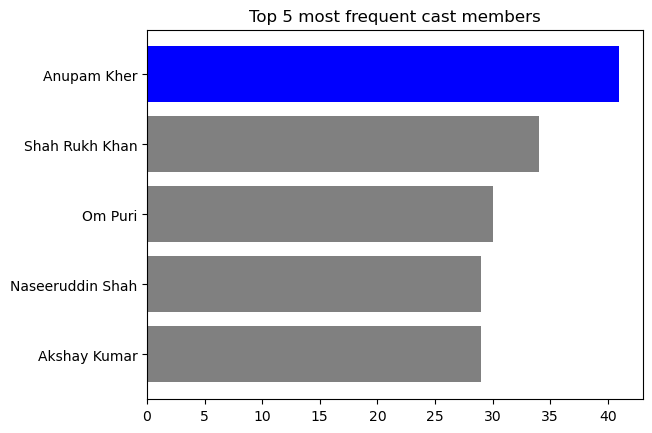

In [108]:
x_cast = most_freq.index
y_cast = most_freq.values

plt.barh(x_cast, y_cast, color=['grey', 'grey','grey', 'grey', 'blue'])
plt.title("Top 5 most frequent cast members")

# **Q5 - Action vs Drama: Movie Duration Comparison**

In [64]:
action_dramas = movies[movies['genre'].isin(['Action','Dramas'])]

In [65]:
action_dramas.groupby('genre').agg({'duration':['min','max','mean','median']})

duration                        
            min  max        mean median
genre                                  
Action       40  214  113.158046  107.5
Dramas        8  224  111.796724  108.0

In [119]:
action_dramas['genre'].unique()

array(['Dramas', 'Action'], dtype=object)

<Axes: ylabel='duration'>

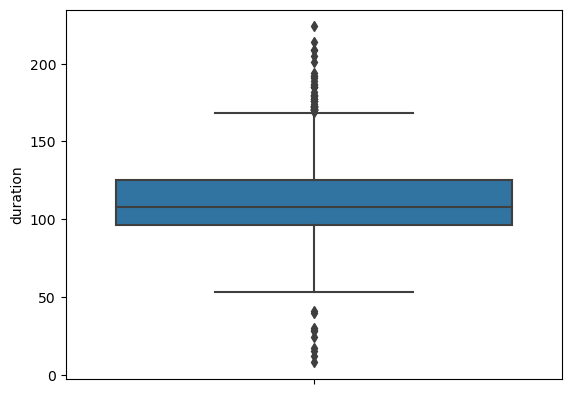

In [67]:
sns.boxplot(data=action_dramas, y='duration', hue='genre')

# Q6 - How Average Duration of Action & Comedy Movies Changed Over the 1990s

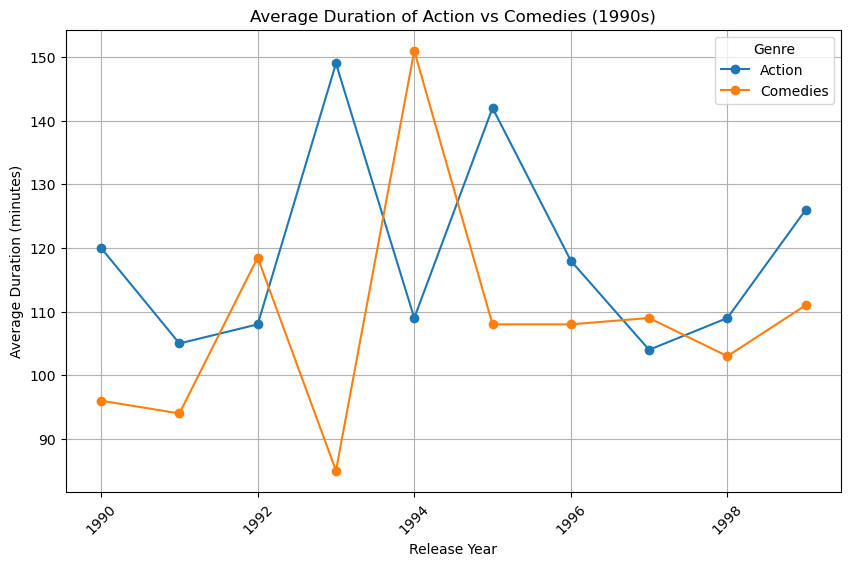

In [68]:
#Filter 90's netflix dataframe for Action and comedy genre
netflix_90s_com_act = netflix_90s[netflix_90s['genre'].isin(['Action', 'Comedies'])]

# Group by year and genre, then calculate the average
duratn_by_genre_year = netflix_90s_com_act.groupby(['release_year', 'genre'])['duration'].median().unstack()

#plotting chart
duratn_by_genre_year.plot(kind='line', figsize=(10, 6), marker='o')

# Customize the plot
plt.title('Average Duration of Action vs Comedies (1990s)')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.show()

# DASHBOARD CREATION

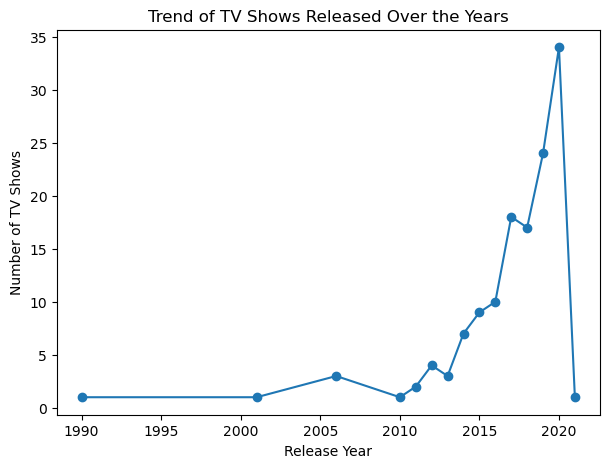

In [69]:
fig, ax = plt.subplots(figsize = (7, 5))

trend = ax.plot(trend_ofshows.index, trend_ofshows.values, marker='o')
plt.xlabel('Release Year')
plt.ylabel('Number of TV Shows')
plt.title('Trend of TV Shows Released Over the Years')
plt.show()

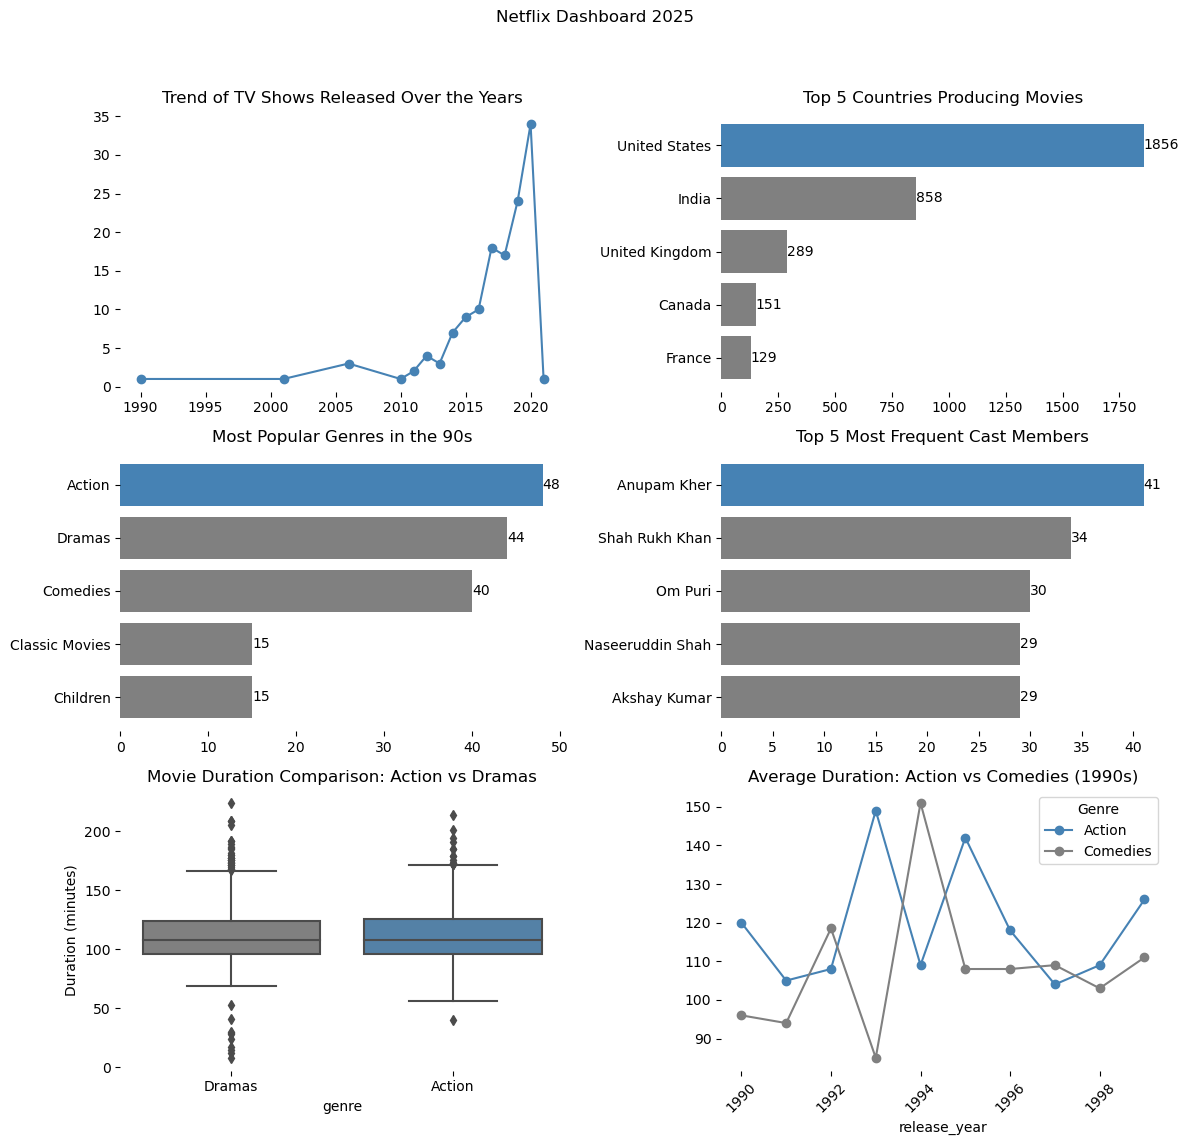

In [153]:
fig, axs = plt.subplots(figsize = (12, 12), nrows= 3, ncols=2)
fig.suptitle("Netflix Dashboard 2025")
fig.subplots_adjust(hspace=0.8)

#TV SHOWS OVERTIME
axs[0, 0].plot(trend_ofshows.index, trend_ofshows.values, marker='o', color = 'steelblue')
axs[0, 0].set_title('Trend of TV Shows Released Over the Years')

#CHART 2: TOP 5 COUNTRIES PRODUCING MOVIES 
bars = axs[0, 1].barh(top_5_country.index, top_5_country.values, color=['grey', 'grey','grey', 'grey', 'steelblue'])
axs[0, 1].bar_label(bars, labels=top_5_country.values.round(2))
axs[0, 1].set_title("Top 5 Countries Producing Movies")


#CHART 3: Most Popular Genres in the 90s
bars = axs[1, 0].barh(pop_genre.index, pop_genre.values, color=['grey', 'grey','grey', 'grey', 'steelblue'])
axs[1, 0].bar_label(bars, labels=pop_genre.values.round(2))
axs[1, 0].set_title("Most Popular Genres in the 90s")


#CHART 4: Top 5 Most Frequent Cast Members
bars = axs[1,1].barh(most_freq.index, most_freq.values, color=['grey', 'grey','grey', 'grey', 'steelblue'])
axs[1,1].bar_label(bars, labels = most_freq.values.round(2))
axs[1,1].set_title("Top 5 Most Frequent Cast Members")

#CHART 5: Action vs Drama: Movie Duration Comparison
sns.boxplot(data=action_dramas, x='genre', y='duration', ax=axs[2, 0], palette={'Action': 'steelblue', 'Dramas': 'grey'})
axs[2, 0].set_title("Movie Duration Comparison: Action vs Dramas")
axs[2, 0].set_ylabel("Duration (minutes)")


#CHART 6: How Average Duration of Action & Comedy Movies Changed Over the 1990s
duratn_by_genre_year.plot(kind='line', marker='o', ax=axs[2, 1], color=['steelblue', 'grey'])
axs[2, 1].set_title('Average Duration: Action vs Comedies (1990s)')
axs[2, 1].legend(title='Genre')
axs[2, 1].tick_params(axis='x', rotation=45)

#CREATING SPACE BETWEEN CHARTS
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#GETTING RID OF SPINES
for spine in axs[2,1].spines.values():
    spine.set_visible(False)

for spine in axs[0,0].spines.values():
    spine.set_visible(False)

for spine in axs[1,0].spines.values():
    spine.set_visible(False)

for spine in axs[1,1].spines.values():
    spine.set_visible(False)

for spine in axs[2,0].spines.values():
    spine.set_visible(False)
    
for spine in axs[0,1].spines.values():
    spine.set_visible(False)
    
#Saving Dashboard as Image
plt.savefig("Netflix Dashboard.png", bbox_inches='tight')
plt.show()


### Insights Generated

1. TV Shows on Netflix Are Increasing Rapidly
   The number of TV shows released has grown steadily over the years, especially after 2015.
   A significant spike occurred around 2020, likely influenced by the COVID-19 pandemic, which gave people more time at home    and increased demand for entertainment content.
   

2. United States Dominates Movie Production
   Holywood leads by a wide margin, producing over 1,800 movies.
   India follows with over 850 Bollywood movies produced, while other countries contribute far less.
   

3. Action Is the Most Popular Genre of the 1990s
   Action tops the list with 48 titles, followed by Dramas and Comedies.
   Classic Movies and Children genres lag behind with only 15 titles each.


4. Frequent Cast Members Are Primarily Bollywood Actors
   Anupam Kher is the most frequent cast member in Netflix's 90s content, appearing in 41 titles.
   Other top names include Shah Rukh Khan, Om Puri, and Akshay Kumar, suggesting strong Indian content representation.


5. Action Movies Tend to Be Slightly Longer Than Dramas
   Median and spread of durations show Action movies are generally longer, though both genres have overlapping ranges.
   

6. Fluctuating Trends in Movie Durations Through the 1990s
   Action and Comedy movie durations varied year by year.
   Action movies were consistently longer, with peaks around 1993 and 1995, while Comedy movies remained shorter and more stable.